In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Vaccine_State.csv')

In [4]:
data.head()

,States,First_Dose,Second_Dose
0,Andaman And Nicobar,294001,200157
1,Andhra Pradesh,32976969,20375181
2,Arunachal Pradesh,771875,534486
3,Assam,20172463,8068795
4,Bihar,49874828,18346781


In [6]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   States       36 non-null     object
 1   First_Dose   36 non-null     int64 
 2   Second_Dose  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


### EDA

In [7]:
data.columns

Index(['States', 'First_Dose', 'Second_Dose'], dtype='object')

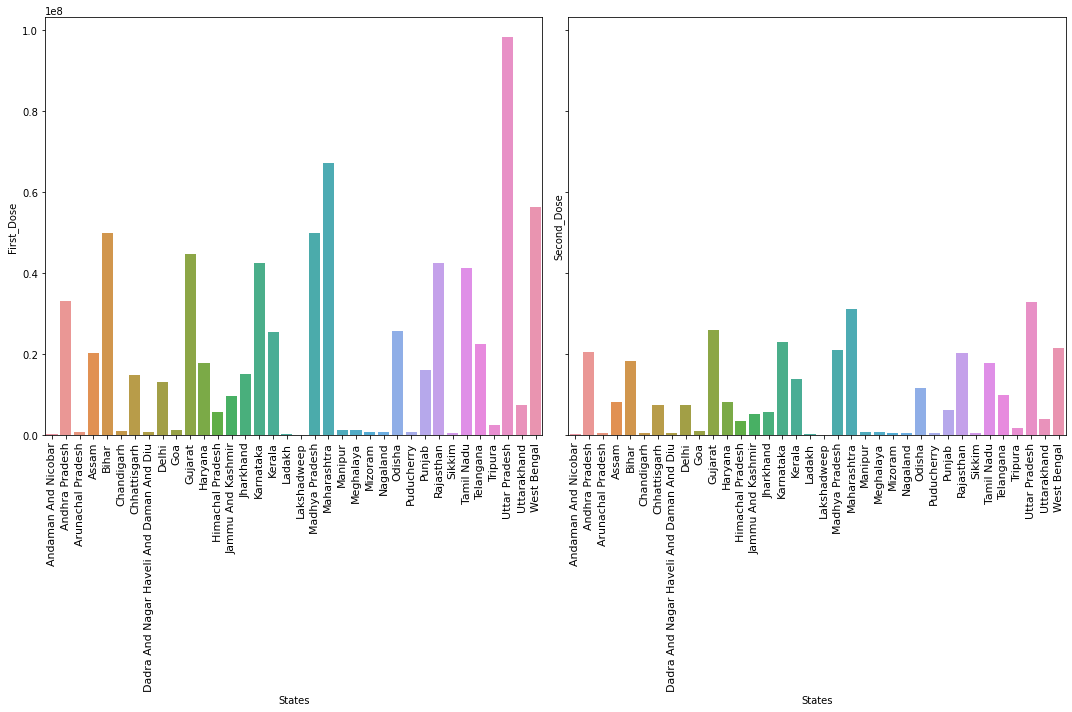

In [91]:
fig1,ax1 = plt.subplots(1, 2,sharey="row",figsize=(15,10))

a=sns.barplot(x="States", y="First_Dose", data=data,ax=ax1[0])
b=sns.barplot(x="States", y="Second_Dose", data=data,ax=ax1[1])
a.set_xticklabels( a.set_xticklabels(a.get_xticklabels(), fontsize=11,rotation=20),fontsize=11,rotation=90)
b.set_xticklabels( b.set_xticklabels(b.get_xticklabels(), fontsize=11,rotation=20),fontsize=11,rotation=90)
plt.tight_layout()

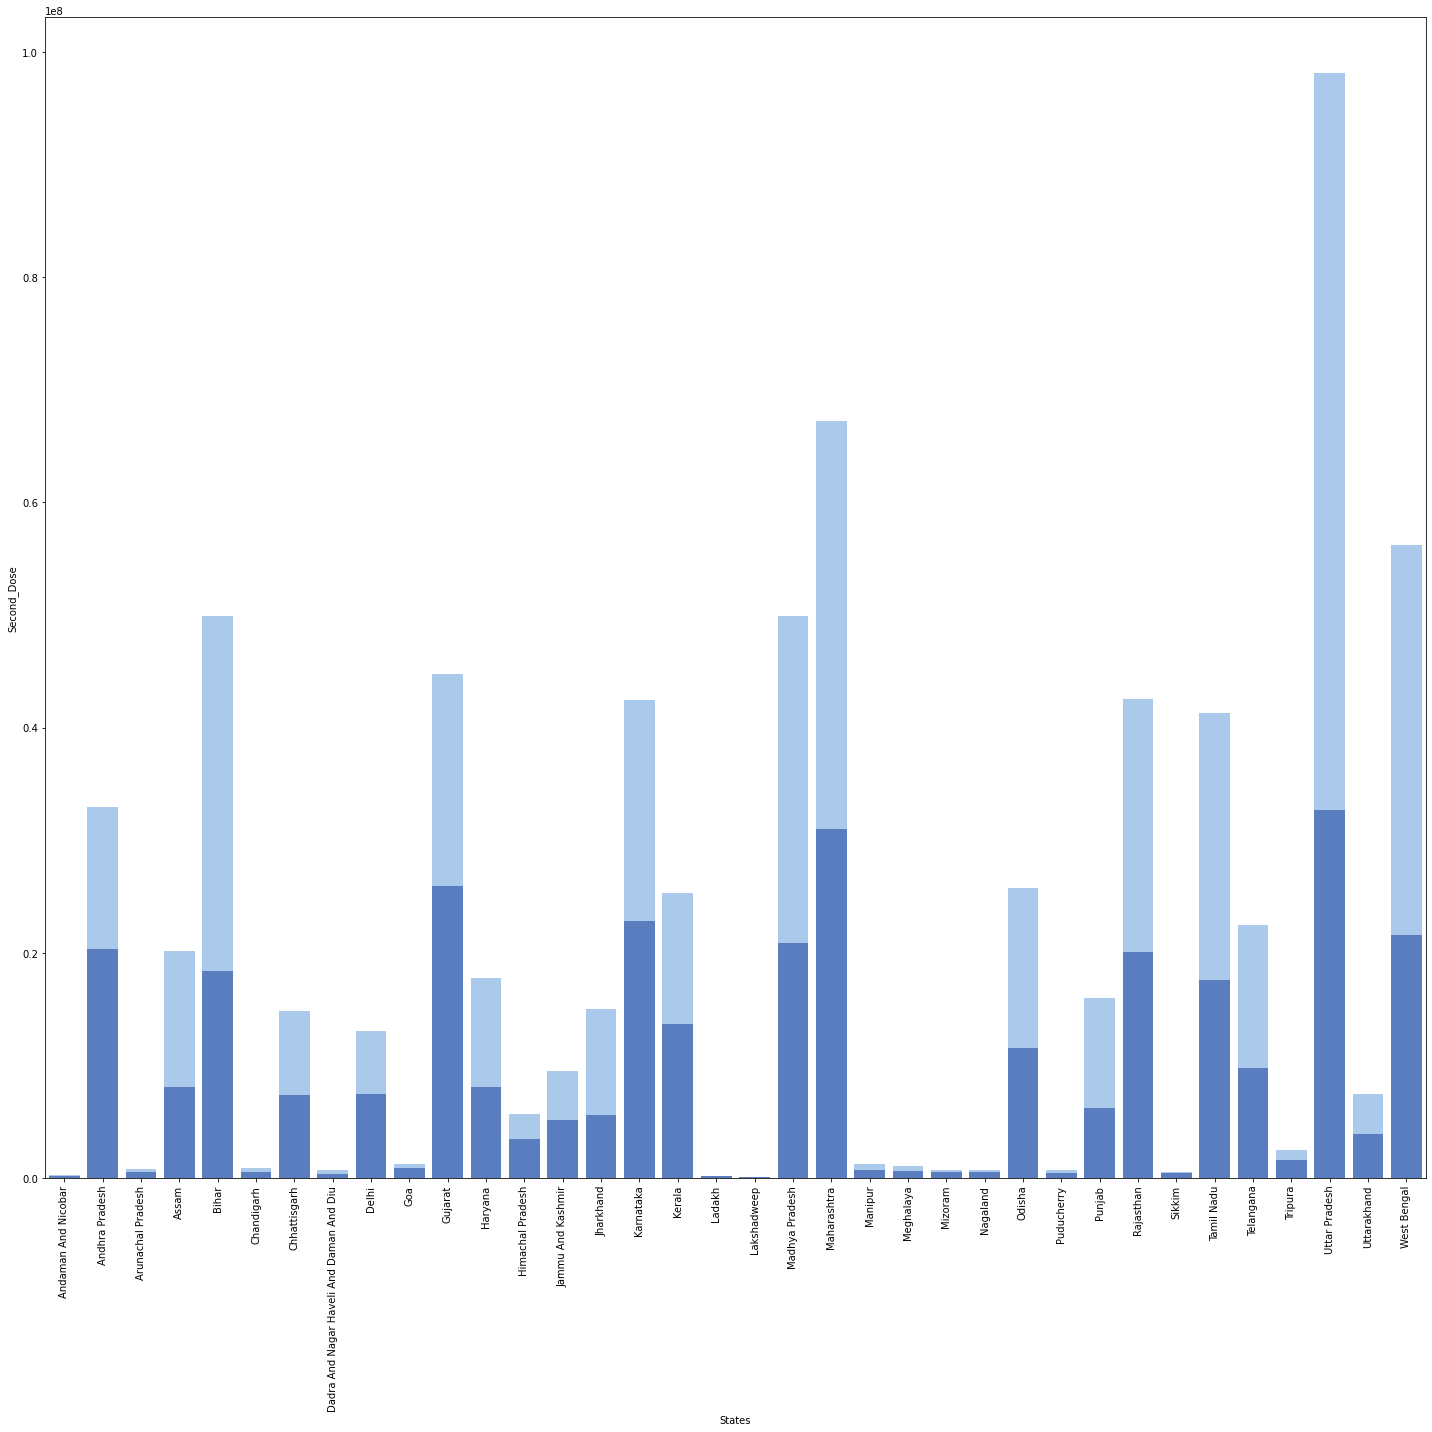

In [97]:
fig2, ax = plt.subplots(1,sharey="row",figsize=(20,20))
sns.set_color_codes("pastel")
sns.barplot(x="States", y="First_Dose", data=data,
            label="Dose 1", color="b")

sns.set_color_codes("muted")
sns.barplot(x="States", y="Second_Dose", data=data,
            label="First_Dose", color="b")
plt.xticks(rotation=90)
plt.tight_layout()

showing the gap between first and second dose

#### Visualization for Smaller States & Finding Out which States are Performing well

we are splitting the data into two dataframes to reduce the length of the graph

In [98]:
#seperating based on the number of first dose give
data_small=data[(data['First_Dose']<3000000)]

In [99]:
data_small.head()

,States,First_Dose,Second_Dose
0,Andaman And Nicobar,294001,200157
2,Arunachal Pradesh,771875,534486
5,Chandigarh,926035,546981
7,Dadra And Nagar Haveli And Daman And Diu,660753,370255
9,Goa,1262568,911114


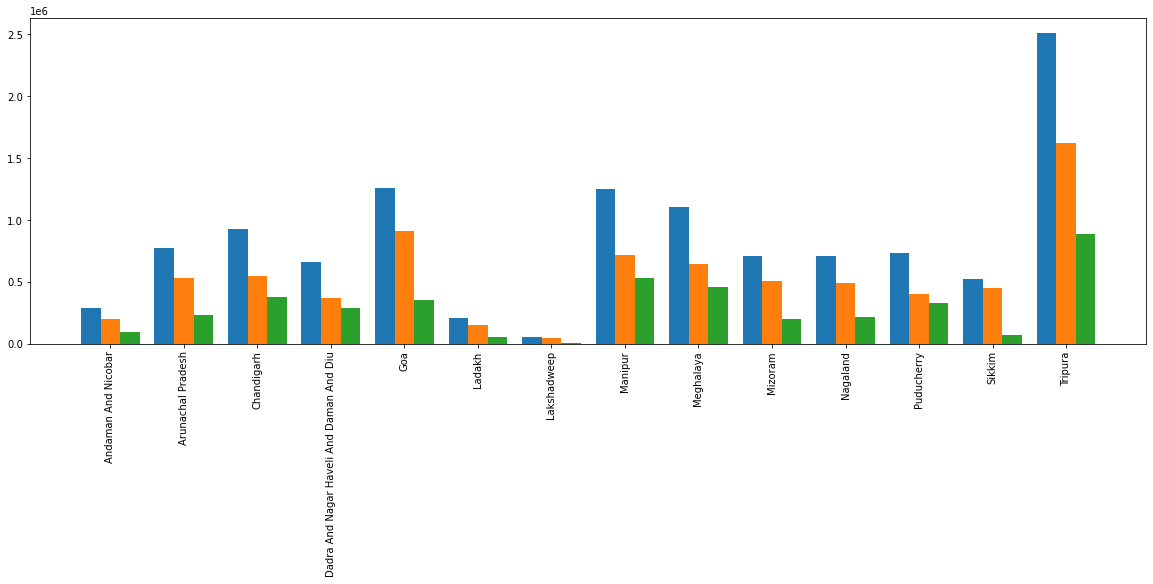

In [117]:
import numpy as np
fig = plt.subplots(1,sharey="row",figsize=(20,6))

X = data_small.States
Y = data_small.First_Dose
Z = data_small.Second_Dose
data_small["net"] = data_small["First_Dose"] - data_small["Second_Dose"] 
YY = data_small.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])
plt.xticks(rotation=90)

plt.show()


#### Visualization for Larger States & Finding Out which States are Performing well

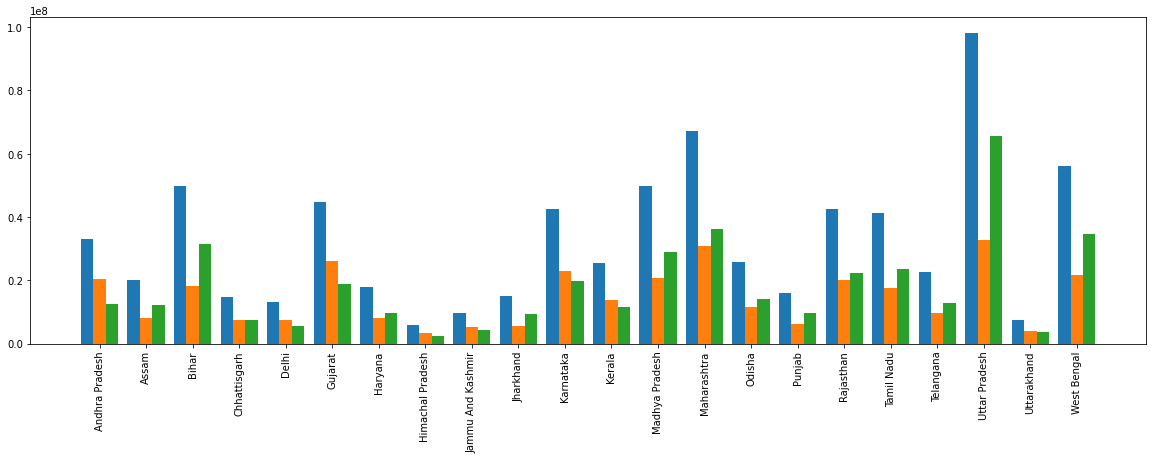

In [116]:
data_large=data[(data['First_Dose']>3000000)]
fig = plt.subplots(1,sharey="row",figsize=(20,6))

X = data_large.States
Y = data_large.First_Dose
Z = data_large.Second_Dose
data_large["net"] = data_large["First_Dose"] - data_large["Second_Dose"] 
YY = data_large.net

def subcategorybar(X, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    
subcategorybar(X, [Y,Z,YY])
plt.xticks(rotation=90)

plt.show()

Here the blue colored bar shows number of persons took first dose,yellow shows number of persons took second dose and the green color shows the difference between first and second dose